# Project Making

In [ ]:
-->Problem statement

# Scope of Work

# solution design and architecture

In [ ]:
#Ruled based(Coding)===>Natasha
#Model based
#zomato,swiggy,flipcart
#Dialogflow,Rasa



#### Dialogflow

In [ ]:
#https://cloud.google.com/dialogflow/?utm_source=google&utm_medium=cpc&utm_campaign=japac-IN-all-en-dr-BKWS-all-mv-trial-EXA-dr-1605216&utm_content=text-ad-none-none-DEV_c-CRE_634266371002-ADGP_Hybrid+%7C+BKWS+-+EXA+%7C+Txt+~+AI+%26+ML_Dialogflow_dialogflow_main-KWID_43700074200986088-kwd-401718033071&userloc_9302211-network_g&utm_term=KW_dialogflow&gad_source=1&gclid=Cj0KCQjwncWvBhD_ARIsAEb2HW-kwmYP95lo-JL-zgA_zDrHxH9F1OZawlcpkuXL-Ktqhh3G06DXNQIaAhDHEALw_wcB&gclsrc=aw.ds

In [ ]:
#https://dialogflow.cloud.google.com/#/getStarted

# Named Entity Recognition

In [ ]:
#NLTK===>Text cleaning, vectorization
#spacy===>NER

### Use case #1 search

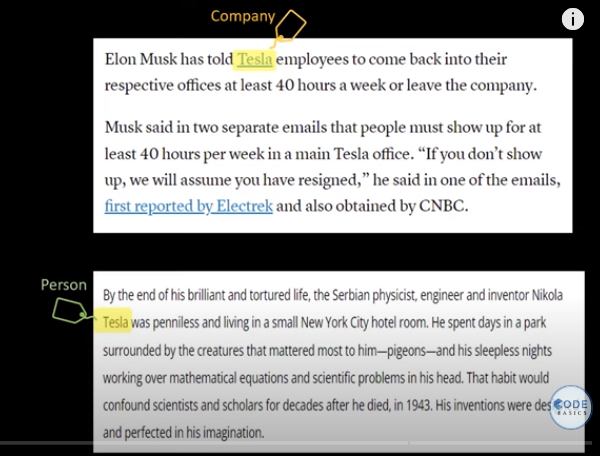

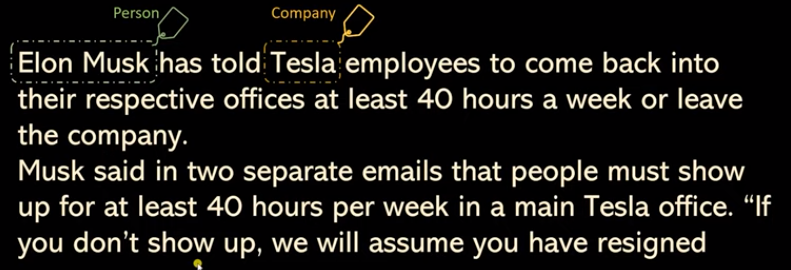

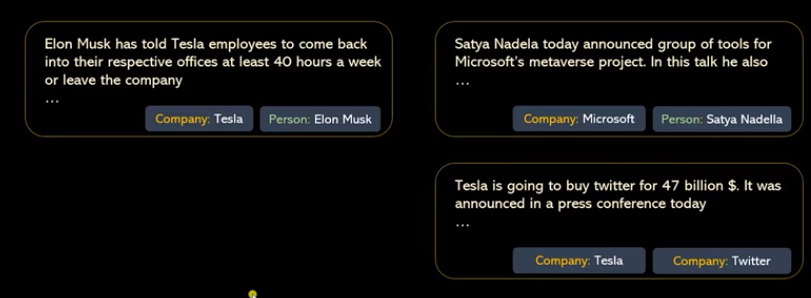

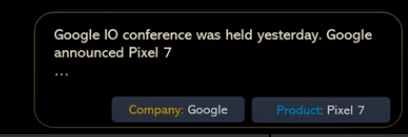

### Use case #2 recommendation

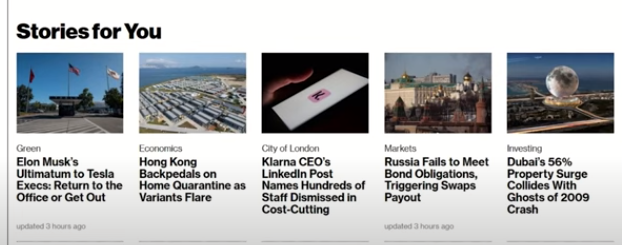

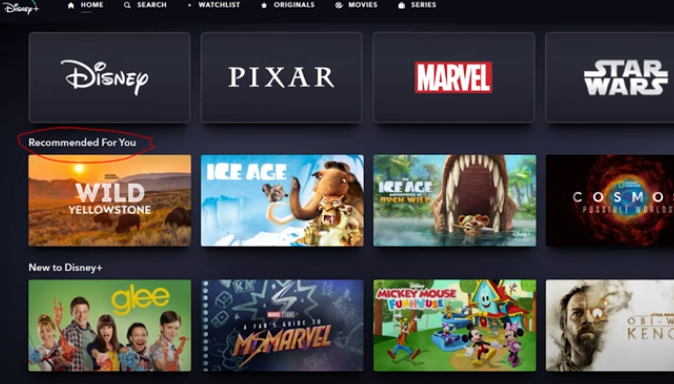

### Use case #3 customer care service

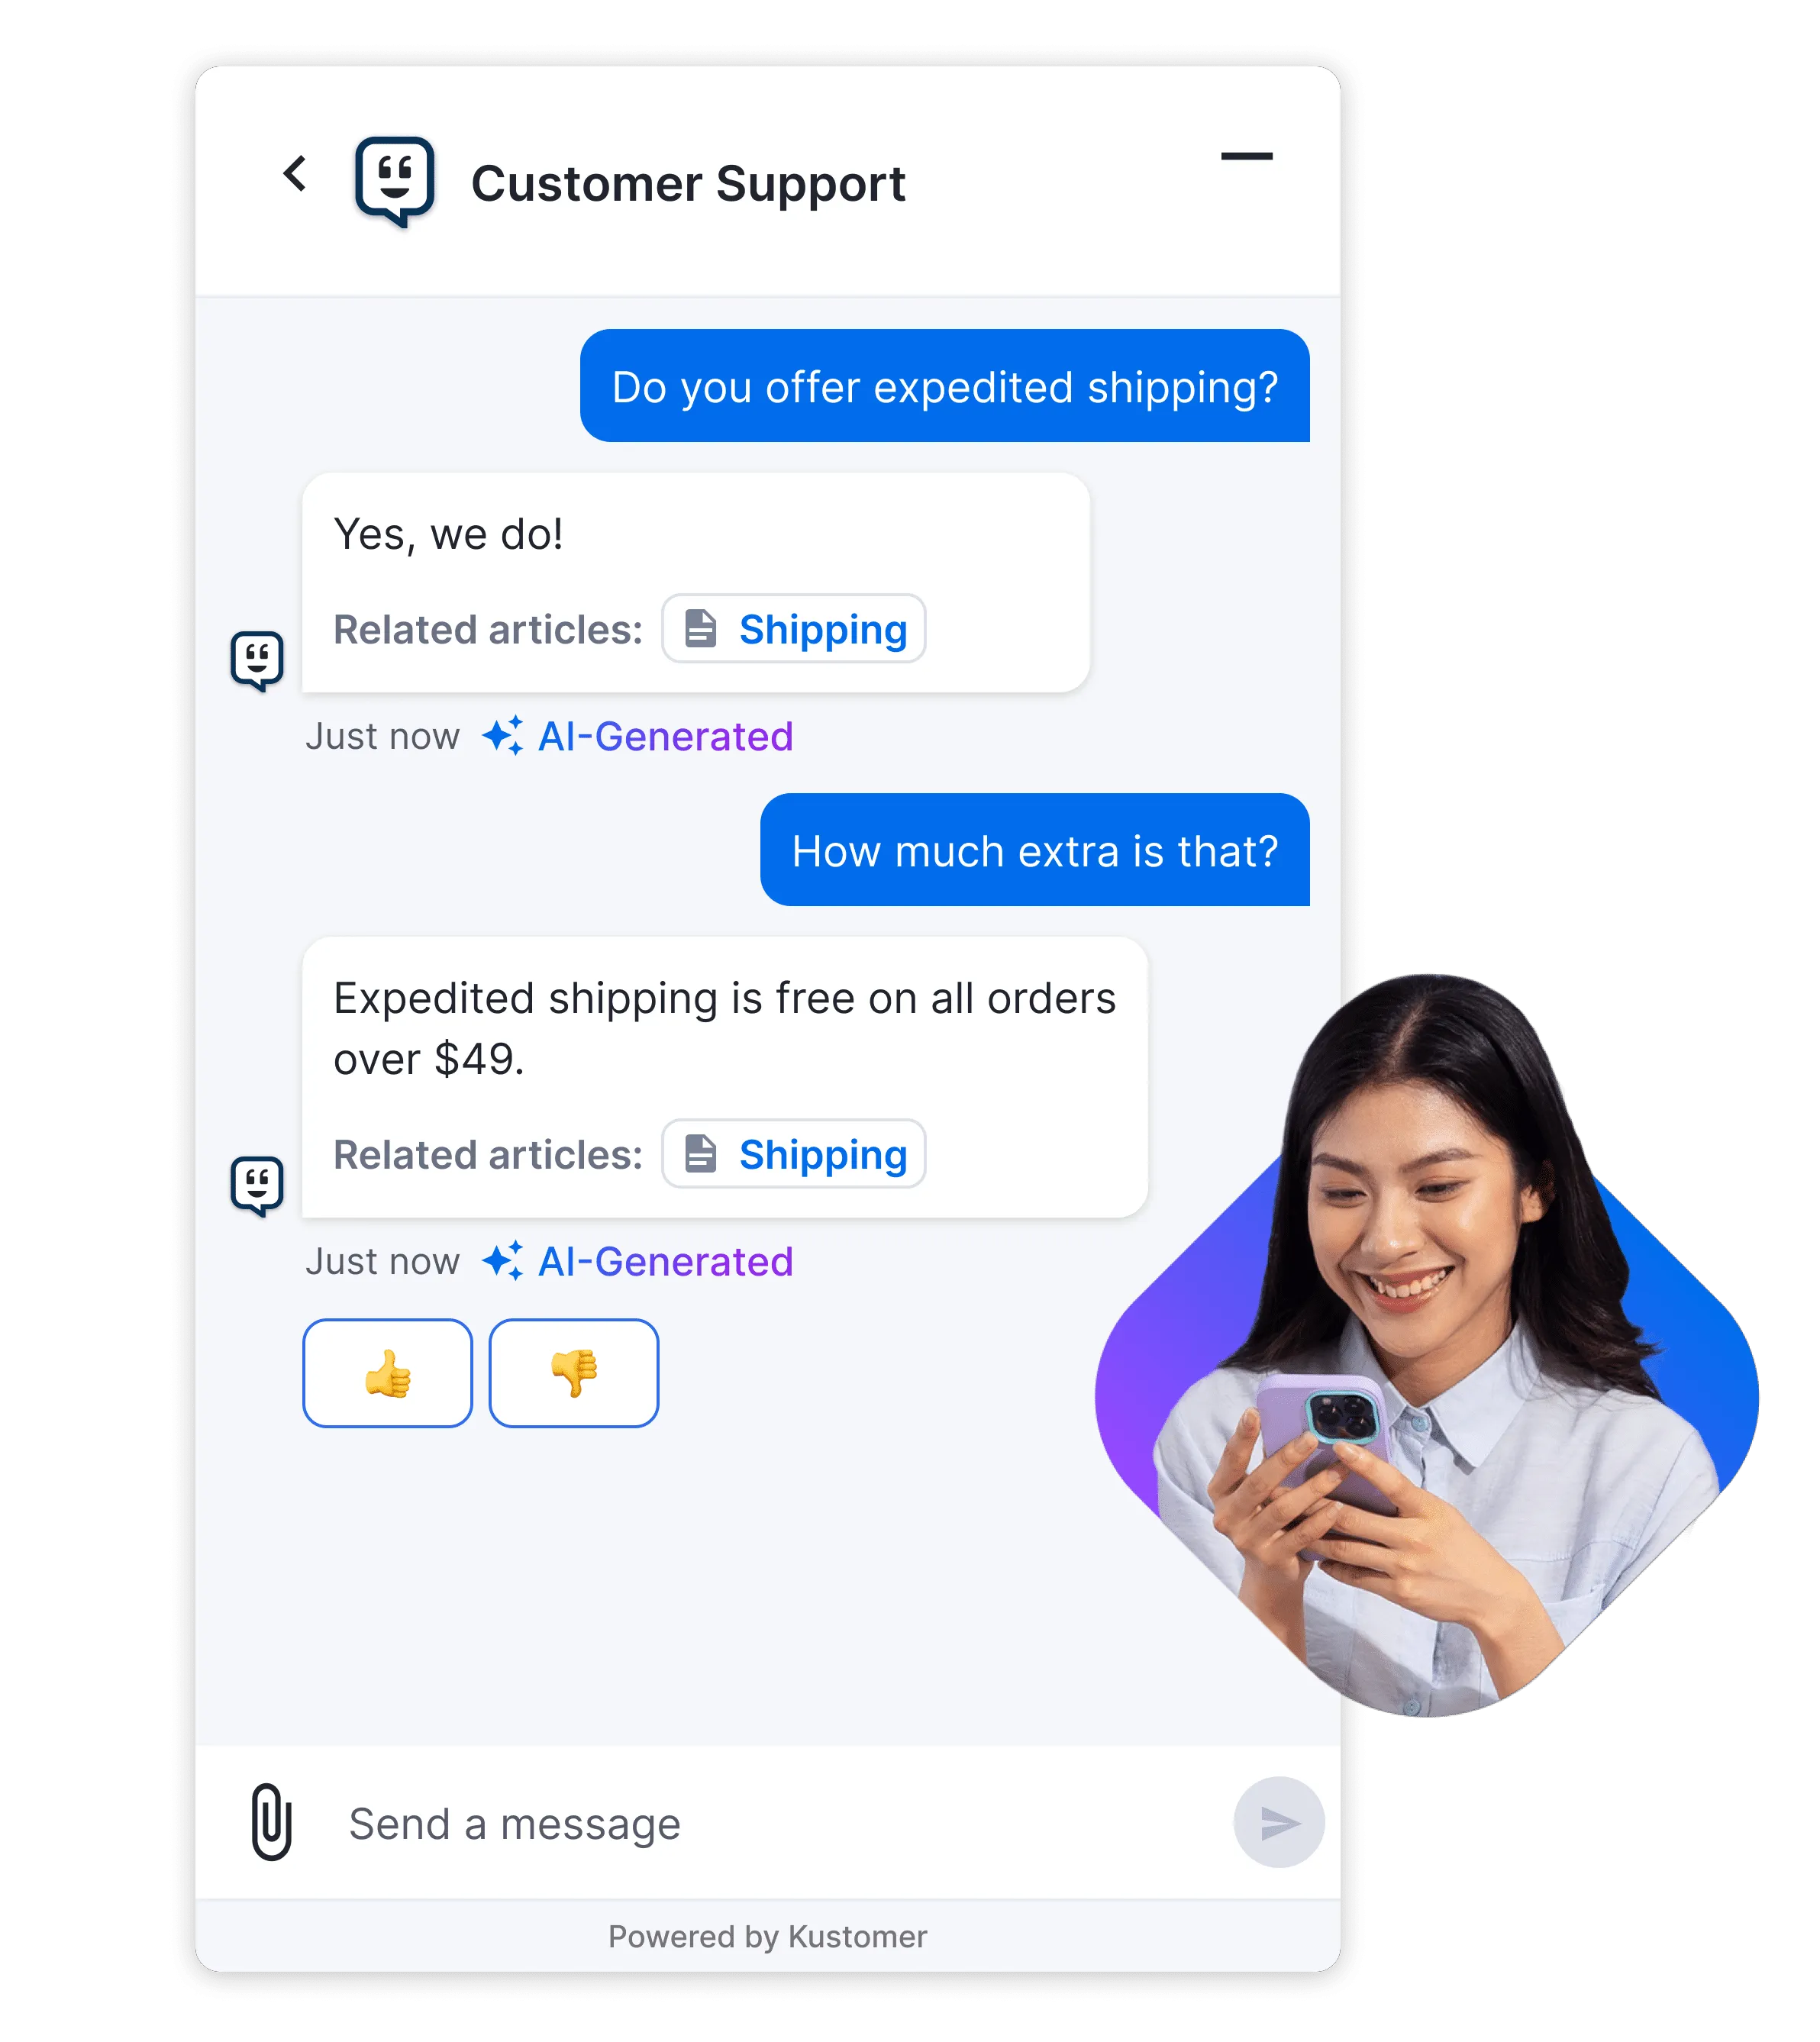

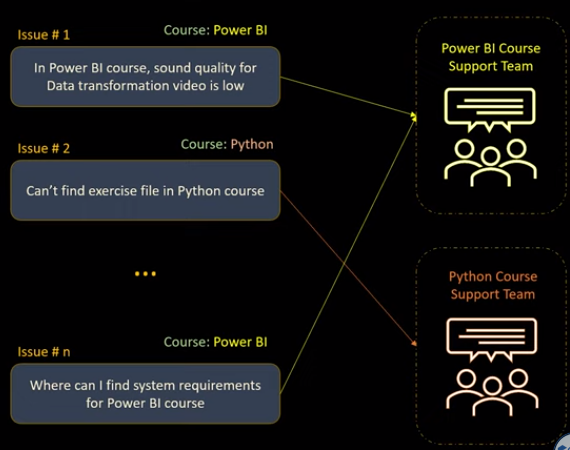

### NER supprt in spacy

In [2]:
pip install spacy


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.1 MB 3.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/12.1 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.1 MB 7.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/12.1 MB 9.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/12.1 MB 11.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.9/12.1 MB 13.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.2/12.1 MB 15.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.1 MB 16.7 MB/s eta 0:00:01
   ------------------------- -------------- 7.7/12.1 MB 18.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.1 MB 19.6 MB/s eta 0:00:01
   ---------------------------------- ----- 10.4/12.1 MB 21.9 MB/s eta 0:00:01
   -------------------------------------- - 11.8/12.1 MB 27.3 MB/s eta 0:0

In [42]:
import spacy

In [43]:
#run this command on annaconda command prompt
#python -m spacy download en_core_web_sm

In [43]:
nlp=spacy.load("en_core_web_sm")

In [6]:
nlp.pipe_names
#components of spacy

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### spacy supports labels

In [7]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [5]:
doc1=nlp("A data scientist is a professional who creates programming code and combines it with statistical knowledge to create insights from data.")

In [9]:
for entity in doc1.ents:
    print(entity.text,"|",entity.label_) #text=word,label_= label name

the doc1 doesn't contain any named entities, so you won't see any entities detected.

In [10]:
doc2=nlp("Tesla inc is going to acuire twitter for $45 billion")

In [11]:
for entity in doc2.ents:
    print(entity.text,"|",entity.label_)

Tesla inc | ORG
$45 billion | MONEY


In [12]:
doc3=nlp("Apple is planning to open a new store in London next month.India")
for entity in doc3.ents:
    print(entity.text,"|",entity.label_,spacy.explain(entity.label_))

Apple | ORG Companies, agencies, institutions, etc.
London | GPE Countries, cities, states
next month | DATE Absolute or relative dates or periods
India | GPE Countries, cities, states


In [13]:
# GPE:geopolitical

In [6]:
from spacy import displacy
displacy.render(doc1,style="ent")

C:\Users\DELL\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [15]:

displacy.render(doc2,style="ent")

##### It didnt recognize that twitter is org.why? coz we have written in small letters

In [16]:
doc2=nlp("Tesla inc is going to acuire Twitter Inc for $45 billion")
displacy.render(doc2,style="ent")

In [17]:

displacy.render(doc3,style="ent")

In [18]:
doc4=nlp("""Mukesh Dhirubhai Ambani (born 19 April 1957) is 
an Indian businessman. He is the chairman and managing director of 
Reliance Industries, India's most valuable company by market value[4] 
with an estimated net worth of $117.8 billion according to Forbes as of March 2024, 
he is the richest person in Asia and 9th richest in the world.[5][6] Sometimes characterized as a
plutocrat,[7] he has attracted both fame and notoriety for reports of market manipulation,
political corruption, cronyism, and exploitation.""")

In [19]:
for entity in doc4.ents:
    print(entity.text,"|",entity.label_,spacy.explain(entity.label_))

Mukesh Dhirubhai Ambani | PERSON People, including fictional
19 April 1957 | DATE Absolute or relative dates or periods
Indian | NORP Nationalities or religious or political groups
Reliance Industries | ORG Companies, agencies, institutions, etc.
India | GPE Countries, cities, states
$117.8 billion | MONEY Monetary values, including unit
Forbes | ORG Companies, agencies, institutions, etc.
March 2024 | DATE Absolute or relative dates or periods
Asia | LOC Non-GPE locations, mountain ranges, bodies of water
9th | ORDINAL "first", "second", etc.
plutocrat,[7 | NORP Nationalities or religious or political groups


# Add custom entity to spacy

In [14]:
#so for that we can use span class of spacy
doc5=nlp("tesla is going to acuire twitter Inc for $45 billion. chetana,gauri,dhruv ,september")
displacy.render(doc5,style="ent")

In [21]:
#we can see here twitter is company name bt our spacy is not recognizing it as ORG 
#so we have to add it manually ,we have to train our spacy again

In [15]:
doc5[0] #single token


tesla

In [16]:
type(doc5[0])

spacy.tokens.token.Token

In [17]:
doc5[0:3]

tesla is going

In [28]:
type(doc5[0:3])

spacy.tokens.span.Span

In [18]:
doc5[5]

twitter

In [19]:
doc5[5:6]

twitter

In [20]:
type(doc5[5:6])

spacy.tokens.span.Span

In [21]:
dir(spacy.tokens)

['Doc',
 'DocBin',
 'MorphAnalysis',
 'Span',
 'SpanGroup',
 'Token',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_dict_proxies',
 '_retokenize',
 '_serialize',
 'doc',
 'morphanalysis',
 'span',
 'span_group',
 'token',
 'underscore']

In [22]:
from spacy.tokens import Span

In [23]:
#setting  twitter as 'ORG'
span2=Span(doc5,5,6,label="ORG")
span2

twitter

In [24]:
doc5.set_ents([span2],default="unmodified") #https://spacy.io/api/doc

In [25]:
displacy.render(doc5,style="ent")

In [26]:
doc5[12:13]

chetana

In [27]:
span3=Span(doc5,12,13,label="PERSON")
span3

chetana

In [28]:
span4=Span(doc5,14,15,label="PERSON")
span4

gauri

In [29]:
doc5.set_ents([span3,span4],default="unmodified") 

In [30]:
displacy.render(doc5,style="ent")

#### Exercise:1

###### Extract all the Geographical (cities, Countries, states) names from a given text

In [55]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""


##### Solution

In [56]:
doc = nlp(text)

In [57]:
doc

Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states

In [58]:
#list for storing all the names
all_gpe_names = []

for ent in doc.ents:
     if ent.label_ == 'GPE':     #checking the whether token belongs to entity "GPE" [Geographical location]
        all_gpe_names.append(ent)



#finally printing the results
print("Geographical location Names: ", all_gpe_names)
print("Count: ", len(all_gpe_names))

Geographical location Names:  [India, Delhi, Gujarat, Tamilnadu, Pongal, Andhrapradesh, Assam, Bihar]
Count:  8


#### Excersie: 2

##### Extract all the birth dates of cricketers in the given Text

In [49]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19-December-1974."""

doc2 = nlp(text)


In [50]:

#list for storing all the dates
all_birth_dates = []

for ent in doc2.ents:
    if ent.label_ == 'DATE':     #checking the whether token belongs to entity "DATE" [Dates]
        all_birth_dates.append(ent)



#finally printing the results
print("All Birth Dates: ", all_birth_dates)
print("Count: ", len(all_birth_dates))

All Birth Dates:  [24 April 1973, 5 November 1988, 7 July 1981, 19-December-1974]
Count:  4


# How can i build my own NER?

#### Approach #1 simple lookup

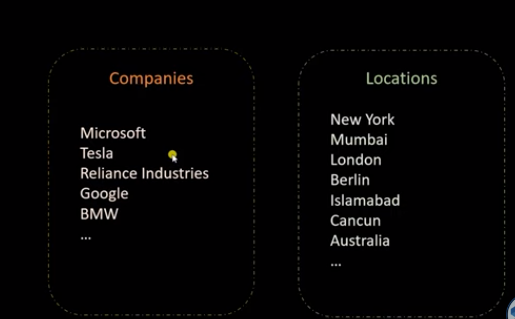

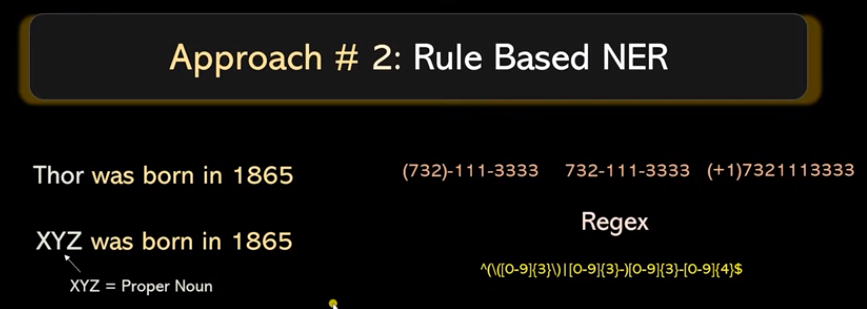

### spacy provides entity ruler

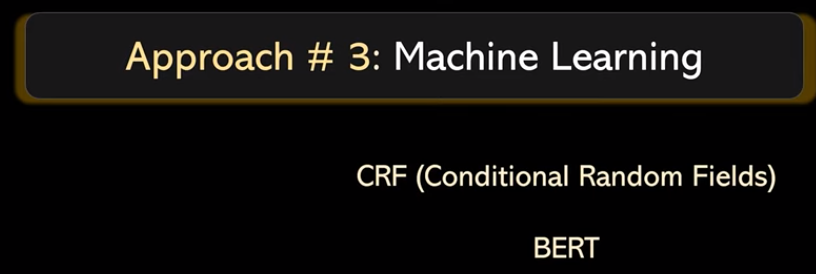

# Intents

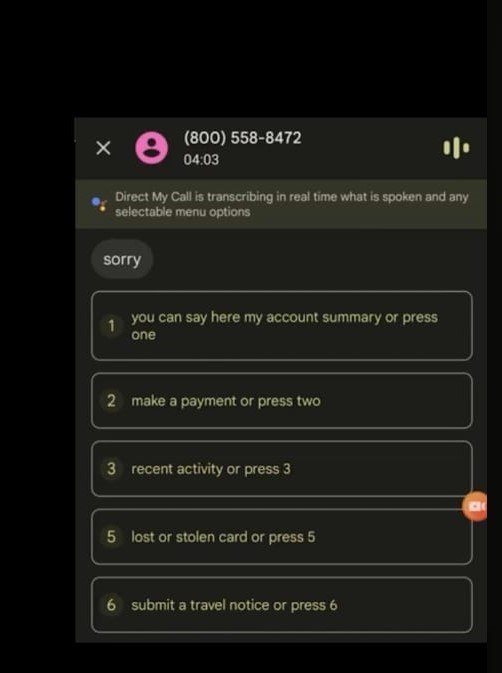

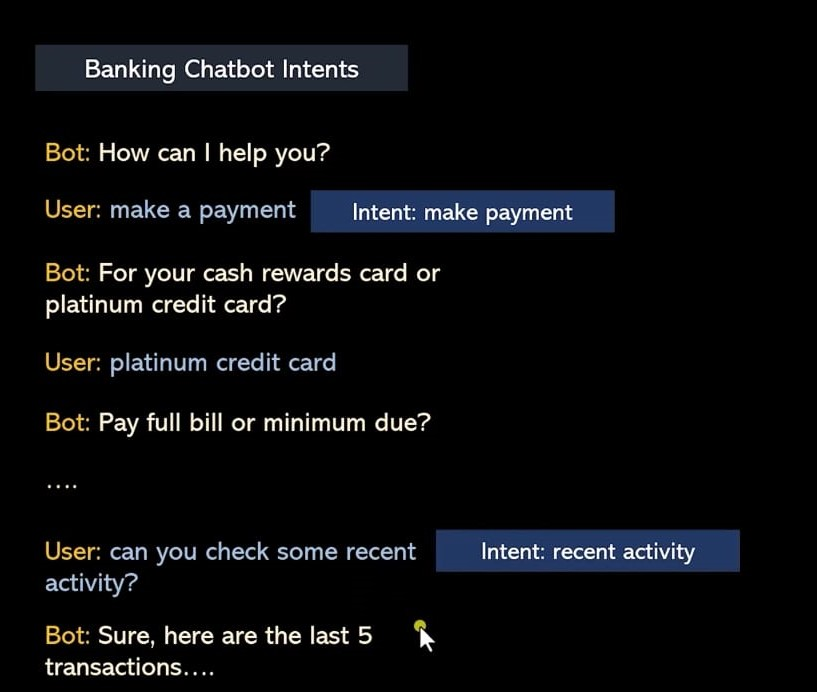

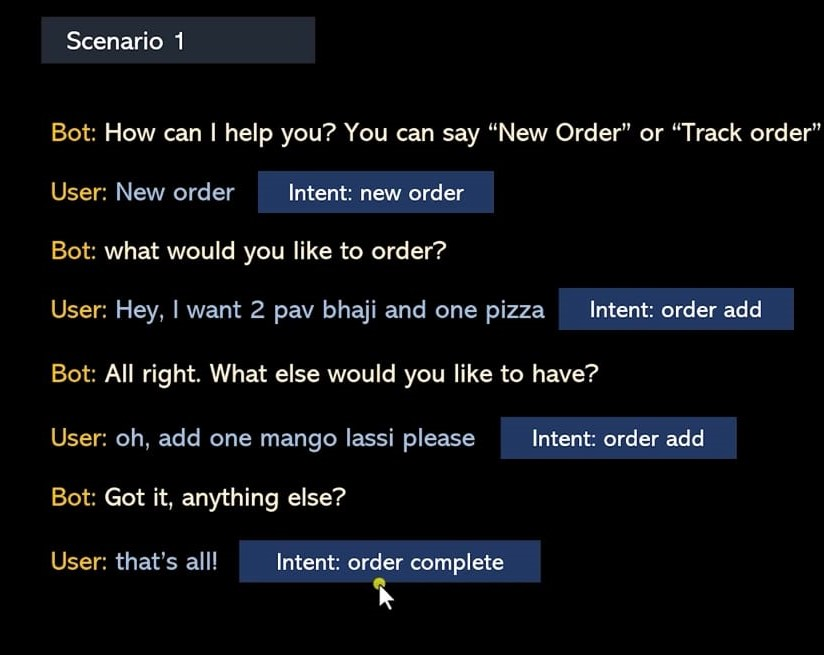

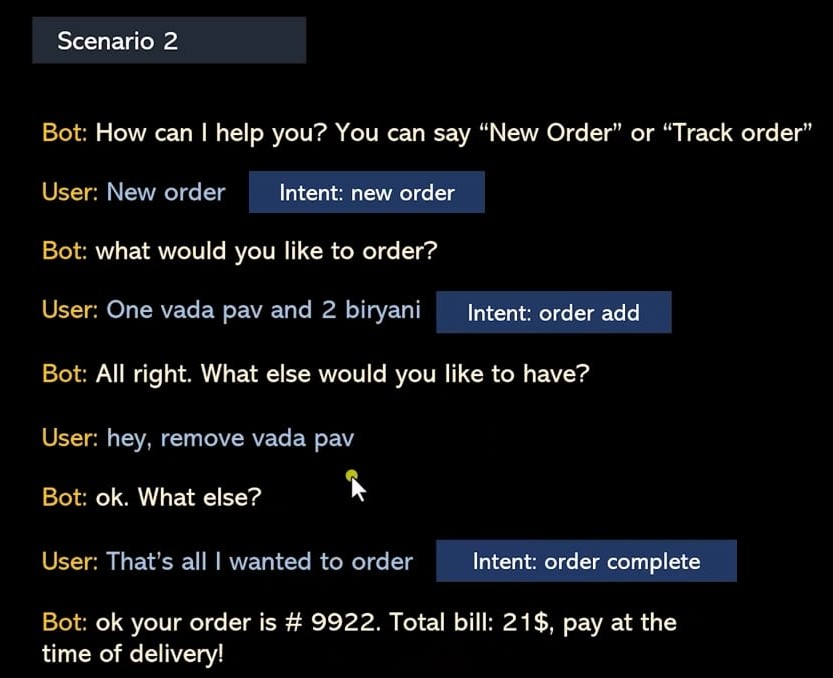

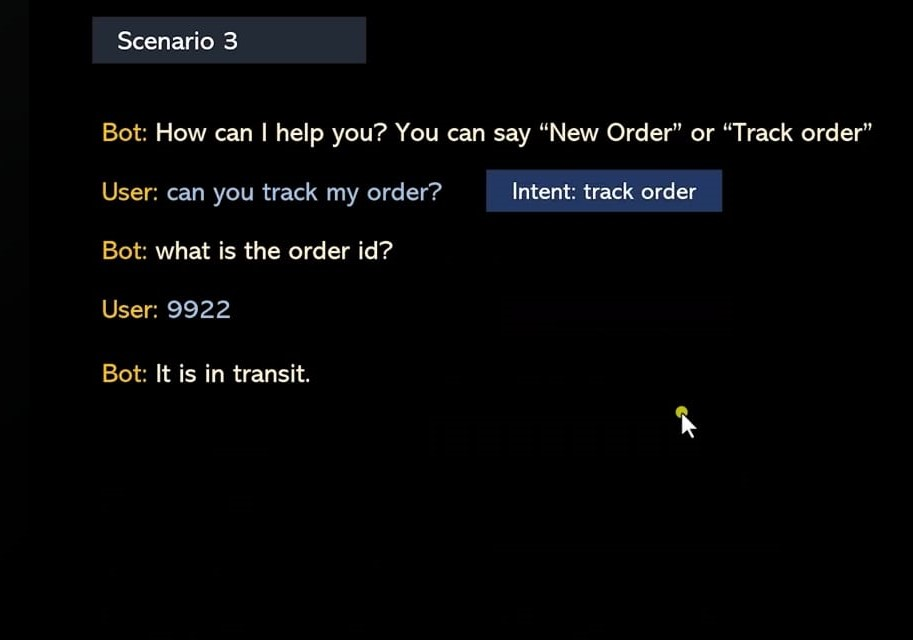

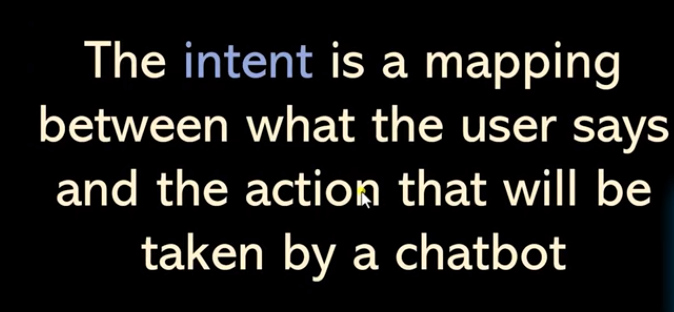

# Entities

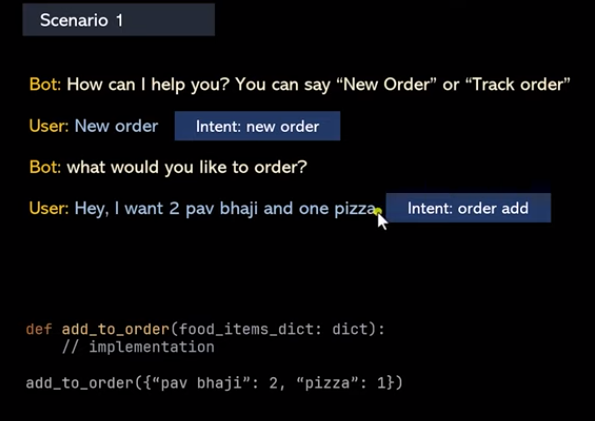

In [ ]:
#here pavbhaji,pizza is our entity

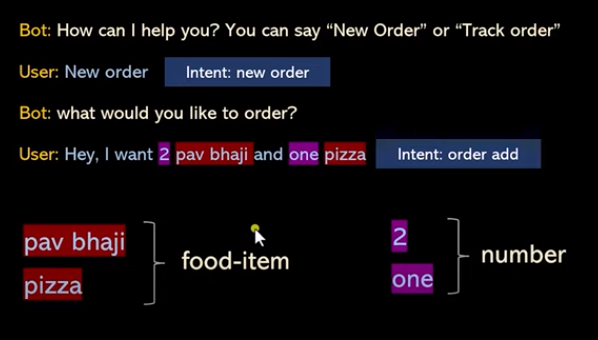

e.g. 
Michel Bloomberg founded Bloomberg   
#Name Entity Disambiguation

# Lets start to build chatbot

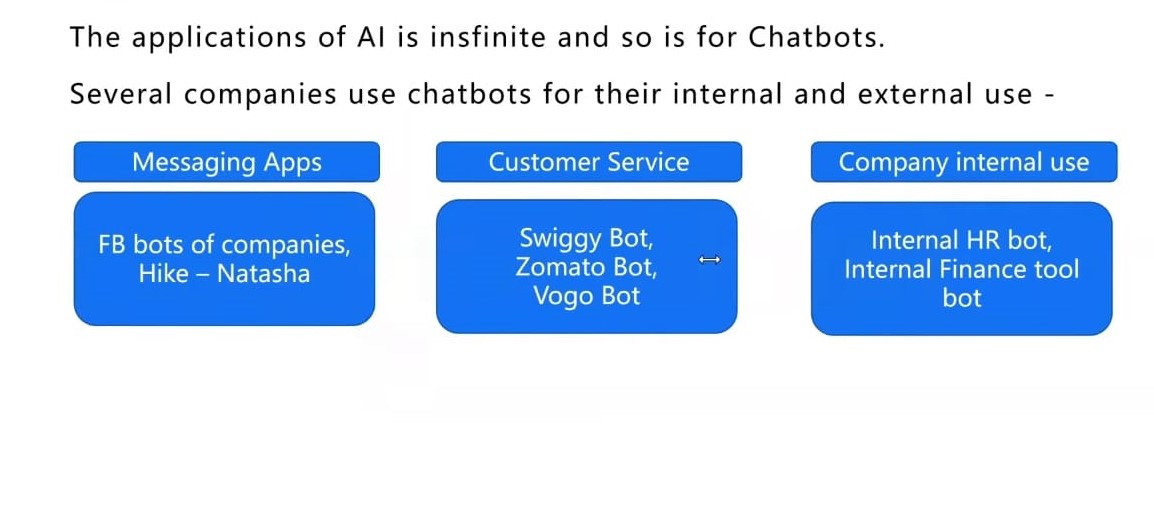

### Types of chatbot

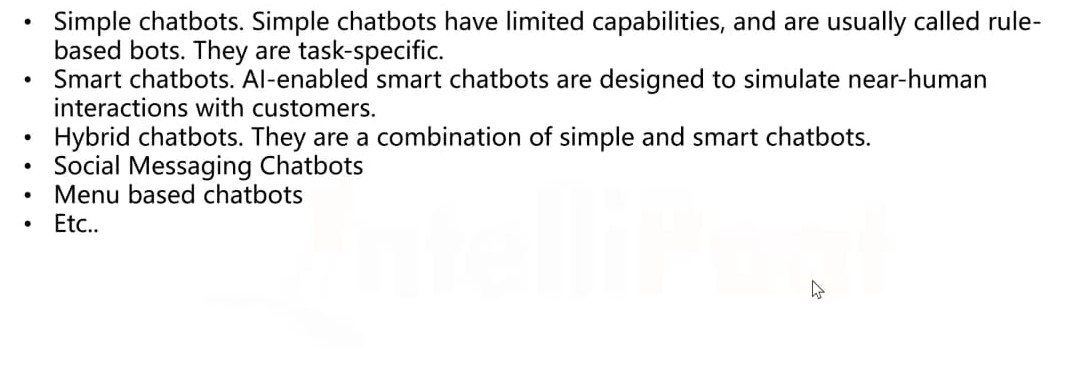

### Rule Based chatbot

In [1]:
import random
import re

# Negative responses
negative_responses = ("no", "nope", "nah", "not a chance", "sorry")

# Keywords for ending the conversation
exit_commands = ("quit", "exit", "goodbye", "bye", "later")

# Random questions to start the conversation
random_questions = [
    "Why are you here?",
    "Are there many humans like you?",
    "What do you consume for sustenance?",
    "Is there intelligent life on this planet?",
    "Does earth have a leader?",
    "What planets have you visited?",
    "What technology do you have on this planet?"
]

# Alien babble responses
alienbabble = {
    "describe_planet_intent": r".*\s*your planet.*",
    "answer_why_intent": r"why\.*",
    "about_ipcs": r".*\s*ipcs.*"
}

def greet():
    name = input("What's your name?\n")
    will_help = input(f"Hi {name}, I am Rule-Bot. Will you help me learn about your planet?\n")
    if will_help.lower() in negative_responses:
        print("Ok, Have a nice Earth day!!")
    else:
        chat()

def make_exit(reply):
    for command in exit_commands:
        if reply == command:
            print("Ok, Have a nice Earth day!!")
            return True
    return False

def chat():
    reply = input(random.choice(random_questions)).lower()
    while not make_exit(reply):
        reply = input(match_reply(reply)).lower()

def match_reply(reply):
    for key, value in alienbabble.items():
        found_match = re.match(value, reply)
        if found_match:
            if key == "describe_planet_intent":
                return describe_planet_intent()
            elif key == "answer_why_intent":
                return answer_why_intent()
            elif key == "about_ipcs":
                return about_ipcs()
    return no_match_intent()

def describe_planet_intent():
    responses = [
        "My planet is a utopia of diverse organisms and species.\n",
        "I am from Opdipus, the capital of the Wayward Galaxies.\n"
    ]
    return random.choice(responses)

def answer_why_intent():
    responses = [
        "I come in peace.\n",
        "I am here to collect data on your planet and its inhabitants.\n",
        "I heard the coffee is good.\n"
    ]
    return random.choice(responses)

def about_ipcs():
    responses = [
        "IPCS is India's largest professional educational company.\n",
        "IPCS will make you learn concepts in a way never experienced before.\n",
        "IPCS is where your career and skills grow.\n"
    ]
    return random.choice(responses)

def no_match_intent():
    responses = [
        "Please tell me more.\n",
        "Tell me more!\n",
        "Why do you say that?\n",
        "I see. Can you elaborate?\n",
        "Interesting. Can you tell me more?\n",
        "I see. How do you think?\n",
        "Why?\n",
        "How do you think I feel when you say that?\n"
    ]
    return random.choice(responses)

# Start the conversation
greet()


What's your name?
 chetana
Hi chetana, I am Rule-Bot. Will you help me learn about your planet?
 yes
Why are you here? I am here to collect data on your planet and its inhabitants.\n
I am from Opdipus, the capital of the Wayward Galaxies.
 
Please tell me more.
 
Why do you say that?
 
How do you think I feel when you say that?
 
I see. How do you think?
 zbnv
Please tell me more.
 bye


Ok, Have a nice Earth day!!


In [2]:
class RuleBot:
    #negative response
    negative_responses=("no","nope","nah","not a chance","sorry")
    #keywords for end conversation
    exit_commands=("quit","exit","goodbye","bye","later")
    #random questions to start coversation
    random_questions=["Why are you here?",
    "Are there many humans like you?",
    "What do you consume for sustenance?",
    "Is there intelligent life on this planet?",
    "Does earth have a leader?",
    "What planets have you viseted",
    "What technology do you have on this planet?"]
    
    def __init__(self):
        self.alienbabble={"describe_planet_intent":r".*\s*your planet.*",
                         "answer_why_intent":r"why\sare.*",
                         "about_ipcs":"r\s*ipcs"}
    def greet(self):
        self.name=input("Whats your name?\n")
        will_help=input(f"Hii {self.name},I am Rule-Bot. Will you help me learn about your planet?\n")
        if will_help in self.negative_responses:
            print("Ok, Have a nice Earth day!!")
            return 
        self.chat()
        
  

    def make_exit(self,reply):
        for command in self.exit_commands:
            if reply==command:
                print("Ok, Have a nice Earth day!!")
                return True
    
    def chat(self):
        reply=input(random.choice(self.random_questions)).lower()
        while not self.make_exit(reply):
            reply=input(self.match_reply(reply))
            
    def match_reply(self,reply):
        for key ,value in self.alienbabble.items():
            intent=key
            regex_pattern=value
            found_match=re.match(regex_pattern,reply)
            if found_match and intent =="describe_planet_intent":
                return self.describe_planet_intent()
            elif found_match and intent =="answer_why_intent":
                return self.answer_why_intent()
            elif found_match and intent =="about_ipcs":
                return self.about_ipcs()
        if not found_match:
            return self.no_match_intent()
    
    def describe_planet_intent(self):
        responses=("My planet is a utopia of diverse organisms and species.\n",
                   "I am from Opdipus, the capital of the Wayward Galaxies.\n")
        return random.choice(responses)
        
        
        
    def answer_why_intent(self):
        responses=("I come in peace\n","I am here to collect data on your planet and its inhabitant\n",
                   "I heard the coffee is good.\n")
        return random.choice(responses)
        
    def about_ipcs(self):
        responses=("IPCS is India's largest professional educational company\n","IPCS will make you learn concepts in the way never experienced before.\n",
                  "IPCS s where your career and skill grows\n")
        return random.choice(responses)
    
    def no_match_intent(self):
        responses=(
        "Please tell me more.\n","Tell me more!\n","Why do you say that?\n","I see.Can you elaborate?\n",
        "Interesting. Can you tell me more?\n","I see. How do you think?\n","Why?\n",
        "How do you think I feel when you say that?\n")
        return random.choice(responses)
        
            

In [3]:
o=RuleBot()

In [4]:
o.greet()

Whats your name?
 chetana
Hii chetana,I am Rule-Bot. Will you help me learn about your planet?
 yes
What do you consume for sustenance? water
Interesting. Can you tell me more?
 yes
How do you think I feel when you say that?
 good
Why do you say that?
 go
Why do you say that?
 go
Why do you say that?
 go
How do you think I feel when you say that?
 no
I see. How do you think?
 bye


Ok, Have a nice Earth day!!


## ML based chatbot


##### NLTK

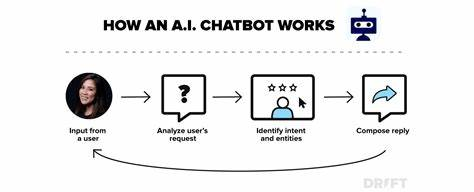

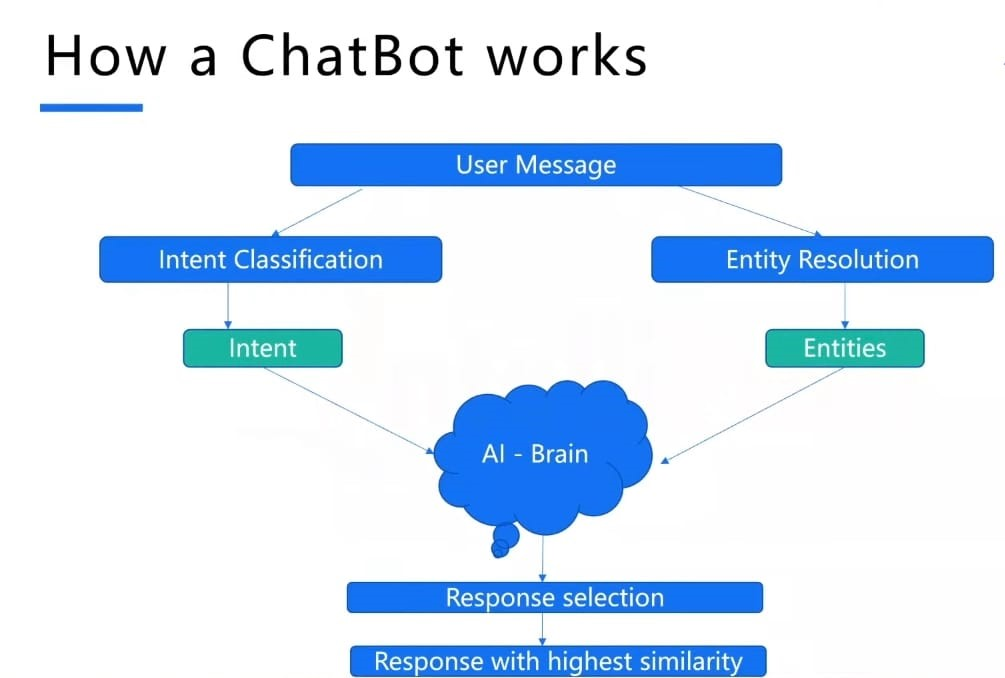

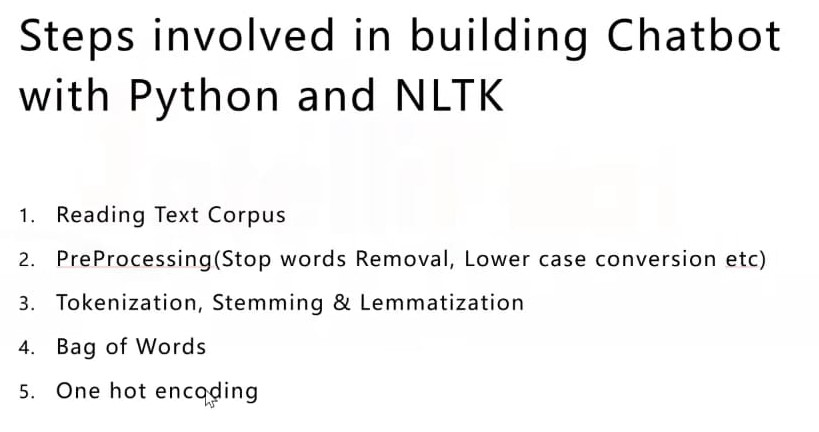

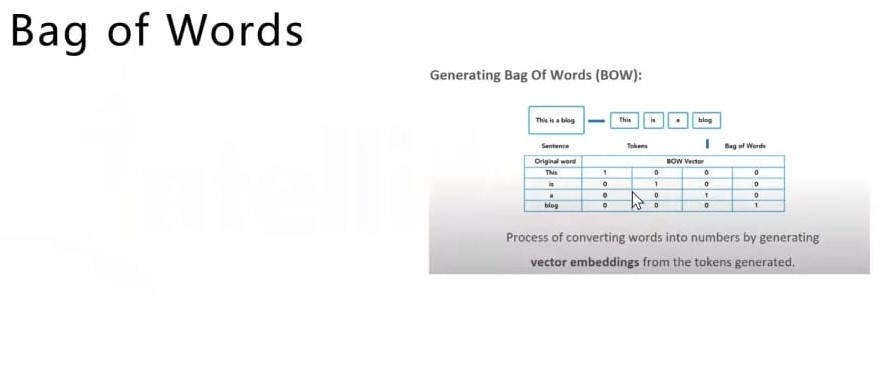

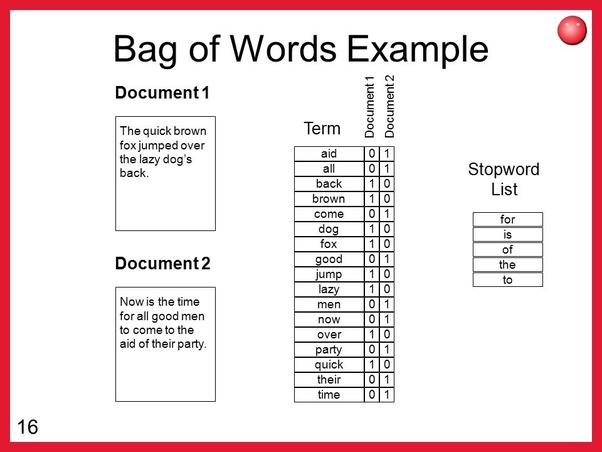

In [12]:
from nltk.stem.wordnet import WordNetLemmatizer

# sample example 

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example sentences
sentences = [
    "The cat is on the mat.",
    "The dog is in the garden.",
    "The cat loves to play with the ball."
]

# User input
user_input = "The dog is playing"

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the sentences
tfidf_matrix = vectorizer.fit_transform(sentences)
# tfidf_matrix.A
# Transform the user input
user_input_tfidf = vectorizer.transform([user_input])
user_input_tfidf.A
# # Calculate cosine similarity
vals = cosine_similarity(user_input_tfidf, tfidf_matrix)
vals
# # Flatten the similarity matrix and sort
flat = vals.flatten()
flat.sort()
flat

# # Get the index of the most similar sentence
idx = vals.argsort()[0][-1]
idx
# Print cosine similarity scores
print("Cosine Similarity Scores:", vals)

# Print sorted similarity values
print("Sorted Similarity Values:", flat)

print("index values",idx)
# Print the most similar sentence
print("Most Similar Sentence:", sentences[idx])


Cosine Similarity Scores: [[0.43082055 0.73515007 0.19030151]]
Sorted Similarity Values: [0.19030151 0.43082055 0.73515007]
index values 1
Most Similar Sentence: The dog is in the garden.


In [89]:
import numpy as np
import nltk
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read training institution information from the text file
with open(r'Act1Scene1.txt', "r") as file:
    institution_info = file.read()

# Preprocessing
sent_tokens = nltk.sent_tokenize(institution_info)
word_tokens = nltk.word_tokenize(institution_info)

# Define responses
def response(user_response):
    # TF-IDF Vectorization
    TfidfVec = TfidfVectorizer(lowercase=True, stop_words="english")
    tfidf = TfidfVec.fit_transform(sent_tokens)
    
    # User input vectorization
    user_tfidf = TfidfVec.transform([user_response])
    
    # Calculate cosine similarity
    vals = cosine_similarity(user_tfidf, tfidf)
    
    # Flatten the similarity matrix and sort
    flat = vals.flatten()
    flat.sort()
    
    # Get the index of the most similar sentence
    idx = vals.argsort()[0][-1]
    
    # Get the most similar sentence
    req_tfidf = flat[-1]
    if req_tfidf == 0:
        return "I'm sorry! I don't understand you."
    else:
        return {
            "index":idx,
            "similarity_matrix": vals,
            "sorted_values": flat,
            "most_similar_sentence": sent_tokens[idx]
        }

# Example of how to use the function
user_input = "Cybersecurity"
response_data = response(user_input)

print("Index is:\n", response_data["index"])
print("Cosine Similarity Matrix:\n", response_data["similarity_matrix"])
print("Sorted Similarity Values:\n", response_data["sorted_values"])
print("Most Similar Sentence:\n", response_data["most_similar_sentence"])


Index is:
 9
Cosine Similarity Matrix:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30267057 0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]]
Sorted Similarity Values:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.30267057]
Most Similar Sentence:
 Cybersecurity:
   - Ethical Hacking Fundamentals
   - Network Security Essentials
   - Cyber Defense Strategies
   - Penetration Testing

5.


#### argsort() function working

In [85]:
vals = np.array([[0.2, 0.88, 0.8]])
vals.argsort()  # Output: array([[0, 1, 2]])
vals.argsort()[0][-1]  # Output: 2



1

In [20]:
def greeting(sentence):
    GREETING_INPUTS = ("hello", "hii", "greetings", "sup", "what's up", "hey","are you there")
    GREETING_RESPONSES = ["hi", "hey", "hello", "I'm glad you're talking to me"]
    
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS or sentence in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)
        

In [21]:
greeting("Hello")

'hi'

# Whole code

In [90]:
# -*- coding: utf-8 -*-

import nltk
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read training institution information from the text file
with open(r'Act1Scene1.txt', "r") as file:
    institution_info = file.read()

# Preprocessing
sent_tokens = nltk.sent_tokenize(institution_info)
word_tokens = nltk.word_tokenize(institution_info)

# Define responses
def response(user_response):
    # TF-IDF Vectorization
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words="english")
    tfidf = TfidfVec.fit_transform(sent_tokens)
    
    # User input vectorization
    user_tfidf = TfidfVec.transform([user_response])
    
    # Calculate cosine similarity
    vals = cosine_similarity(user_tfidf, tfidf)
    idx = vals.argsort()[0][-1]
    flat = vals.flatten()
    flat.sort()
    
    # Get the most similar sentence
    req_tfidf = flat[-1]
    if req_tfidf == 0:
        return "I'm sorry! I don't understand you."
    else:
        return sent_tokens[idx]

# Define greetings
def greeting(sentence):
    GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up", "hey")
    GREETING_RESPONSES = ["hi", "hey", "hello", "I'm glad you're talking to me"]
    
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

# Preprocessing functions
def LemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Main loop
if __name__ == "__main__":
    flag = True
    print("Welcome to Training Institution Bot! How can I assist you today?")
    while flag:
        user_response = input("You: ").lower()
        if user_response != 'bye':
            if greeting(user_response) is not None:
                print("Bot: " + greeting(user_response))
            else:
                print("Bot:", response(user_response))
        else:
            flag = False
            print("Bot: Goodbye! Have a great day!")


Welcome to Training Institution Bot! How can I assist you today?


You:  Cybersecurity


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Bot: Cybersecurity:
   - Ethical Hacking Fundamentals
   - Network Security Essentials
   - Cyber Defense Strategies
   - Penetration Testing

5.


You:  hi


Bot: hey


You:  bye


Bot: Goodbye! Have a great day!


In [ ]:
We will configure our chatbot in dialogflow
Fast API

In [ ]:
# Dialiog flow provides there own intents
# https://dialogflow.cloud.google.com/#/agent/ipcs-chatbot-xlwk/intents
#Default welcome intent 
#https://dialogflow.cloud.google.com/#/agent/ipcs-chatbot-xlwk/editIntent/056e55f8-c43d-4219-916b-98232917c13a/

#    DialogFlow

In [ ]:
by default uh will get 2 intents in dialogflow

- Default Welcome intent 
- Default Fallback intent 

### Default Welcome intent 

### Default Fallback intent 